In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [2]:
df = pd.read_csv('C:\\Users\\User\\GoMyCode Ass\\Africa_climate_change.csv')
df.head()

,DATE,PRCP,TAVG,TMAX,TMIN,COUNTRY
0,19800101 000000,NaN,54.0,61.0,43.0,Tunisia
1,19800101 000000,NaN,49.0,55.0,41.0,Tunisia
2,19800101 000000,0.0,72.0,86.0,59.0,Cameroon
3,19800101 000000,NaN,50.0,55.0,43.0,Tunisia
4,19800101 000000,NaN,75.0,91.0,NaN,Cameroon


In [3]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d %H%M%S')
df.head()

,DATE,PRCP,TAVG,TMAX,TMIN,COUNTRY
0,1980-01-01,NaN,54.0,61.0,43.0,Tunisia
1,1980-01-01,NaN,49.0,55.0,41.0,Tunisia
2,1980-01-01,0.0,72.0,86.0,59.0,Cameroon
3,1980-01-01,NaN,50.0,55.0,43.0,Tunisia
4,1980-01-01,NaN,75.0,91.0,NaN,Cameroon


In [4]:
df['PRCP'] = df['PRCP'].fillna(df['PRCP'].mean())
df['TAVG'] = df['TAVG'].fillna(df['TAVG'].mean())
df['TMAX'] = df['TMAX'].fillna(df['TMAX'].mean())
df['TMIN'] = df['TMIN'].fillna(df['TMIN'].mean())

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464815 entries, 0 to 464814
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   DATE     464815 non-null  datetime64[ns]
 1   PRCP     464815 non-null  float64       
 2   TAVG     464815 non-null  float64       
 3   TMAX     464815 non-null  float64       
 4   TMIN     464815 non-null  float64       
 5   COUNTRY  464815 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 21.3+ MB


'From the plot, both Tunisia and Cameroon show relatively consistent average temperatures over the years. \nHowever, Tunisia experiences a noticeable downward shift in temperature towards the later years, \nsuggesting a potential climate anomaly or trend that warrants further investigation.'

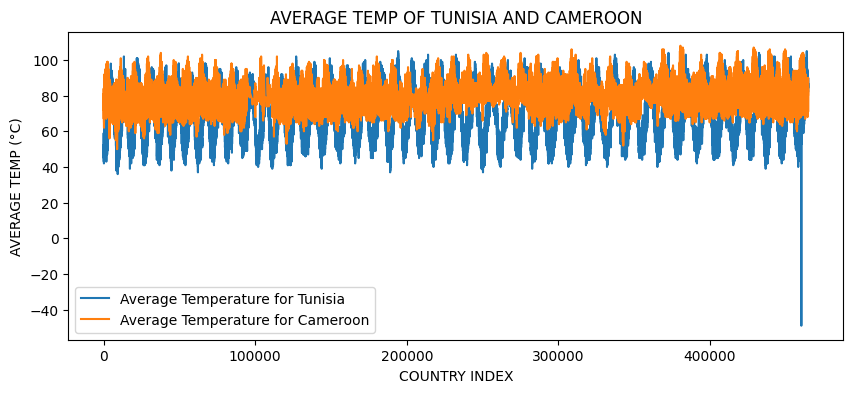

In [40]:
# Plot a line chart to show the average temperature fluctuations in Tunisia and Cameroon. Interpret the results.
s = df.query('COUNTRY == "Tunisia"')
s1 = df.query('COUNTRY == "Cameroon"')
plt.figure(figsize=(10,4))
plt.plot(s.index,s['TAVG'],label='Average Temperature for Tunisia')
plt.plot(s1.index,s1['TAVG'],label='Average Temperature for Cameroon')
plt.xlabel('COUNTRY INDEX')
plt.ylabel('AVERAGE TEMP (°C)')
plt.title('AVERAGE TEMP OF TUNISIA AND CAMEROON')
plt.legend();

"""From the plot, both Tunisia and Cameroon show relatively consistent average temperatures over the years. 
However, Tunisia experiences a noticeable downward shift in temperature towards the later years, 
suggesting a potential climate anomaly or trend that warrants further investigation."""

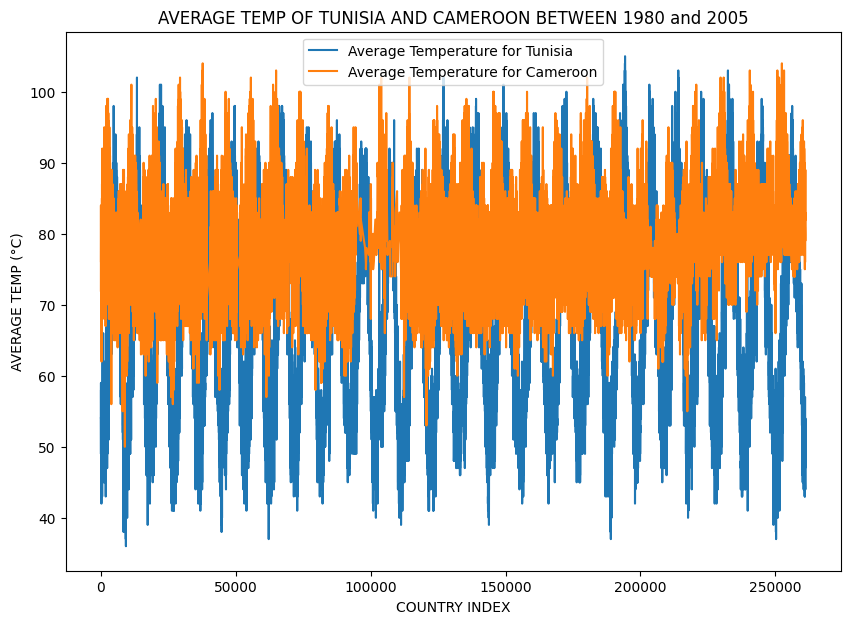

In [39]:
# Zoom in to only include data between 1980 and 2005, try to customize the axes labels.
x = df.query('1980 <= DATE <= 20051231 and COUNTRY == "Tunisia"')
x1 = df.query('1980 <= DATE <= 20051231 and COUNTRY == "Cameroon"')
plt.figure(figsize=(10,7))
plt.plot(x.index,x['TAVG'],label='Average Temperature for Tunisia')
plt.plot(x1.index,x1['TAVG'],label='Average Temperature for Cameroon')
plt.xlabel('COUNTRY INDEX')
plt.ylabel('AVERAGE TEMP (°C)')
plt.title('AVERAGE TEMP OF TUNISIA AND CAMEROON BETWEEN 1980 and 2005')
plt.legend();

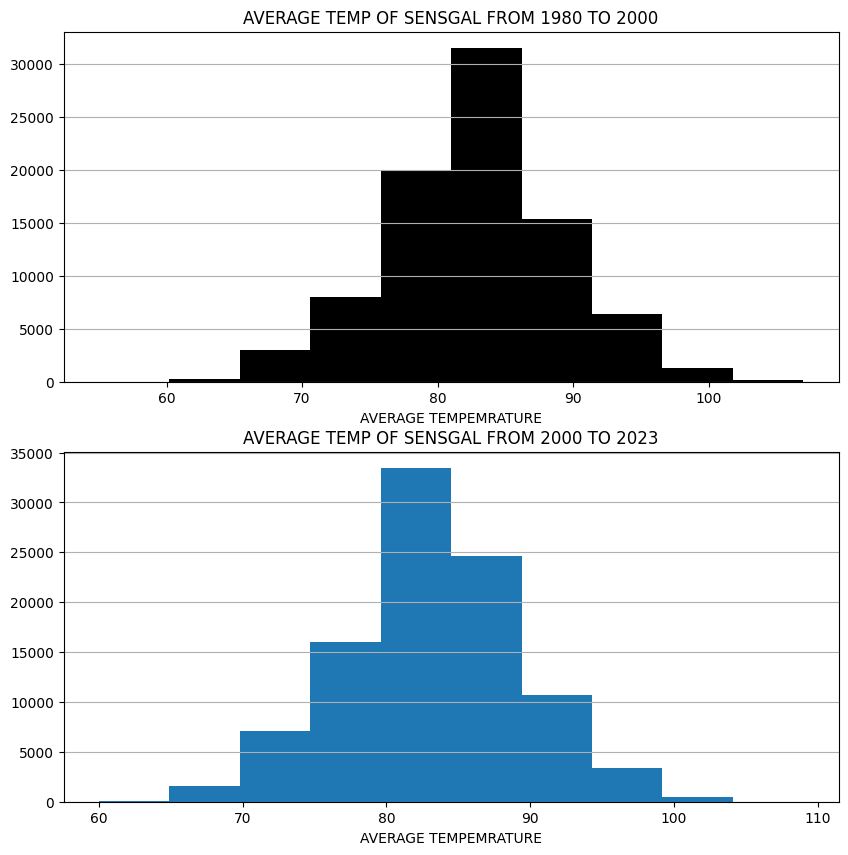

In [13]:
# Create Histograms to show temperature distribution in Senegal between [1980,2000] and [2000,2023] (in the same figure). Describe the obtained results.
c = df.query('1980 <= DATE <= 19991231 and COUNTRY == "Senegal"')
c1 = df.query('2000 <= DATE <= 20231231 and COUNTRY == "Senegal"')
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.hist(c['TAVG'],color='black')
plt.xlabel('AVERAGE TEMPEMRATURE')
plt.title('AVERAGE TEMP OF SENEGAL FROM 1980 TO 2000')
plt.grid(axis='y')
plt.subplot(2,1,2)
plt.hist(c1['TAVG'])
plt.xlabel('AVERAGE TEMPEMRATURE')
plt.title('AVERAGE TEMP OF SENEEGAL FROM 2000 TO 2023')
plt.grid(axis='y')

''' From the bar chart, we can observe that Senegal's temperature distribution during 1980-2000 closely resembles that of 2000-2023. 
However, there's a subtle shift in the earlier period where the temperatures distribution of some temperature in the distribution is 
slightly high than that of the later years and vice versa.'''

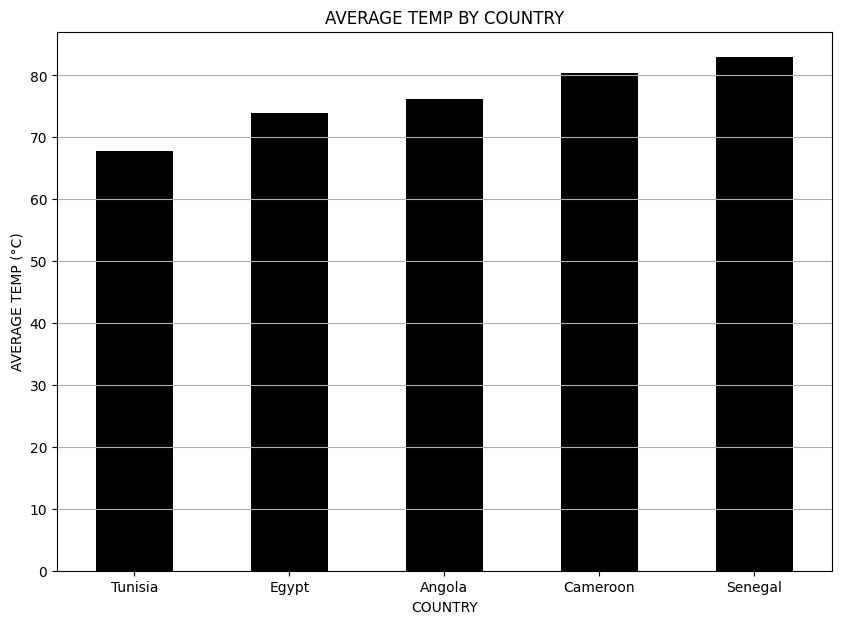

In [9]:
# Select the best chart to show the Average temperature per country.
avg_temp = df.groupby('COUNTRY')['TAVG'].mean().sort_values()
plt.figure(figsize=(10,7))
avg_temp.plot(kind='bar',color='black')
plt.xlabel('COUNTRY')
plt.ylabel('AVERAGE TEMP (°C)')
plt.title('AVERAGE TEMP BY COUNTRY')
plt.grid(axis='y')
plt.xticks(rotation=360);

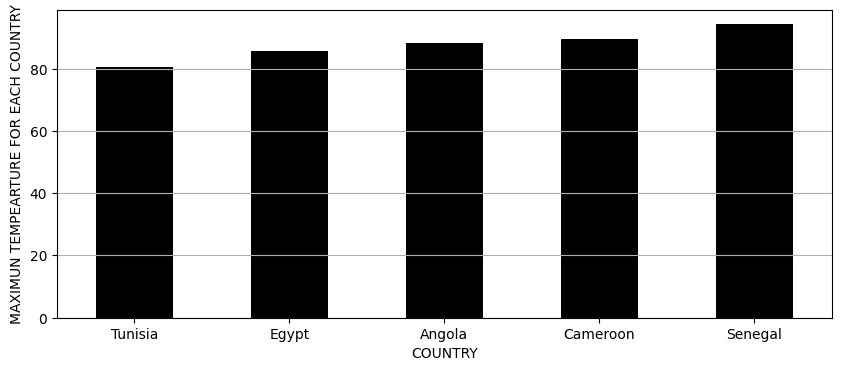

In [23]:
# Make your own questions about the dataset and try to answer them using the appropriate visuals.
# Which country has the highest Mean Maximun temperature
max_temp = df.groupby('COUNTRY')['TMAX'].mean().sort_values()

plt.figure(figsize=(10,4))
max_temp.plot(kind='bar',color='black')
plt.xlabel('COUNTRY')
plt.ylabel('MAXIMUN TEMPEARTURE FOR EACH COUNTRY')
plt.grid(axis = 'y')
plt.xticks(rotation=360);

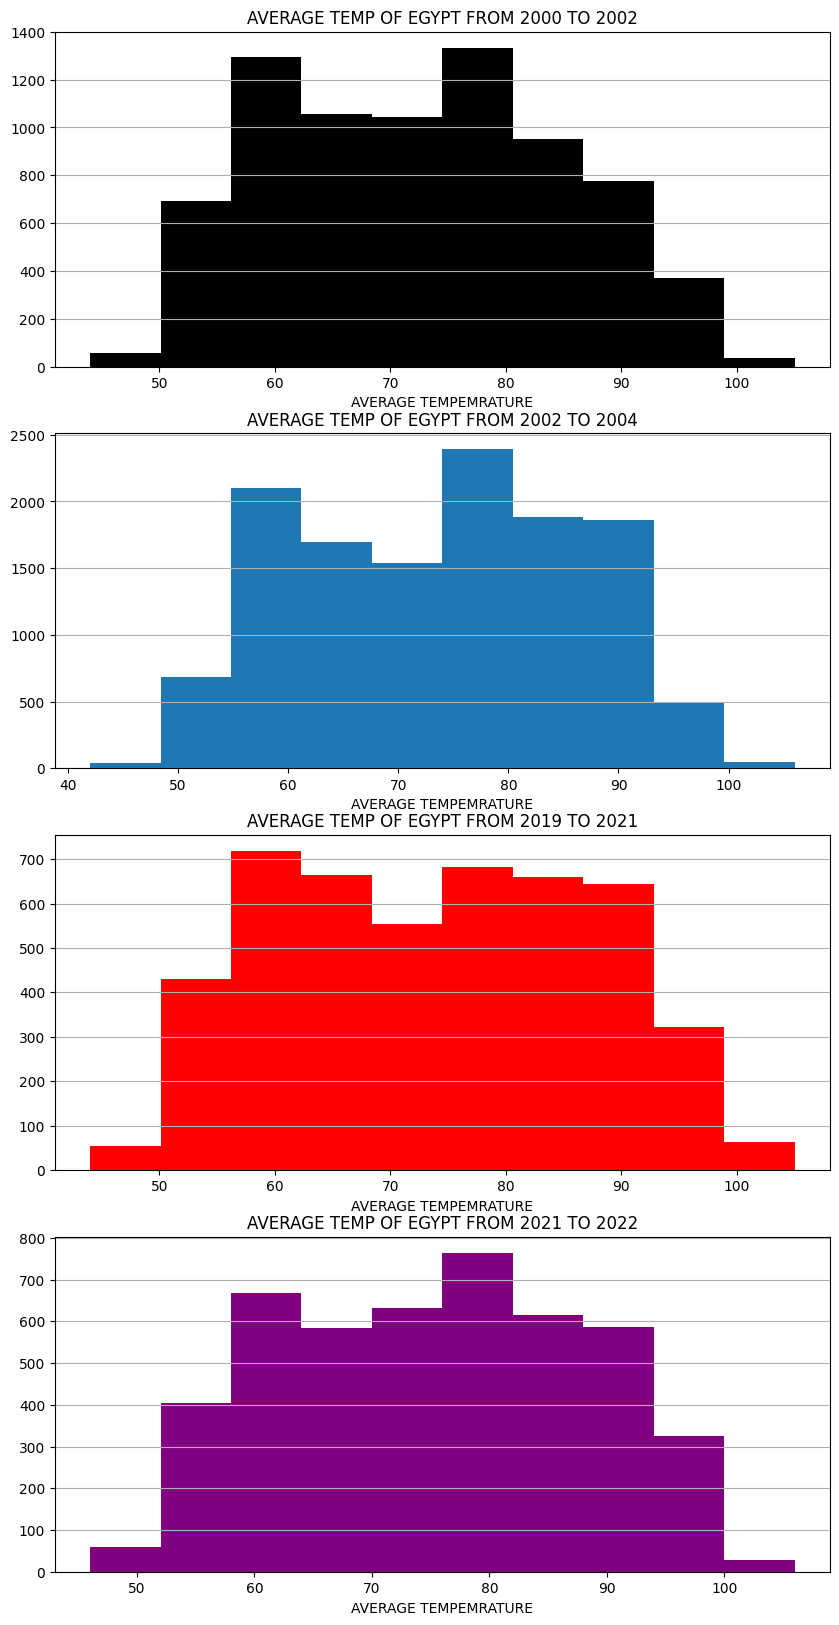

In [38]:
# show temperature distribution in Egypt in a two year interval to see the distribution
d = df.query('2000 <= DATE <= 20011231 and COUNTRY == "Egypt"')
d1 = df.query('2002 <= DATE <= 20041231 and COUNTRY == "Egypt"')
d2 = df.query('2019 <= DATE <= 20201231 and COUNTRY == "Egypt"')
d3 = df.query('2021 <= DATE <= 20221231 and COUNTRY == "Egypt"')
plt.figure(figsize=(10,20))
plt.subplot(4,1,1)
plt.hist(d['TAVG'],color='black')
plt.xlabel('AVERAGE TEMPEMRATURE')
plt.title('AVERAGE TEMP OF EGYPT FROM 2000 TO 2002')
plt.grid(axis='y')
plt.subplot(4,1,2)
plt.hist(d1['TAVG'])
plt.xlabel('AVERAGE TEMPEMRATURE')
plt.title('AVERAGE TEMP OF EGYPT FROM 2002 TO 2004')
plt.grid(axis='y')
plt.subplot(4,1,3)
plt.hist(d2['TAVG'],color='red')
plt.xlabel('AVERAGE TEMPEMRATURE')
plt.title('AVERAGE TEMP OF EGYPT FROM 2019 TO 2021')
plt.grid(axis='y')
plt.subplot(4,1,4)
plt.hist(d3['TAVG'],color='purple')
plt.xlabel('AVERAGE TEMPEMRATURE')
plt.title('AVERAGE TEMP OF EGYPT FROM 2021 TO 2022')
plt.grid(axis='y')